# HW 1: Linear Algebra and Floating Point Arithmetic, (Part 1: Direct Methods for the solution of Linear Systems)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [19]:
def direct_method_pipeline(A, n):
    x_true = np.ones(n)
    y = np.dot(A, x_true)

    cond_2 = np.linalg.cond(A, p=2)
    cond_inf = np.linalg.cond(A, p=np.inf)

    x_computed = np.linalg.solve(A, y)

    relative_error = np.linalg.norm(x_computed - x_true, np.inf) / np.linalg.norm(x_true, np.inf)

    return cond_2, cond_inf, relative_error

## Testing the program

#### Random matrix

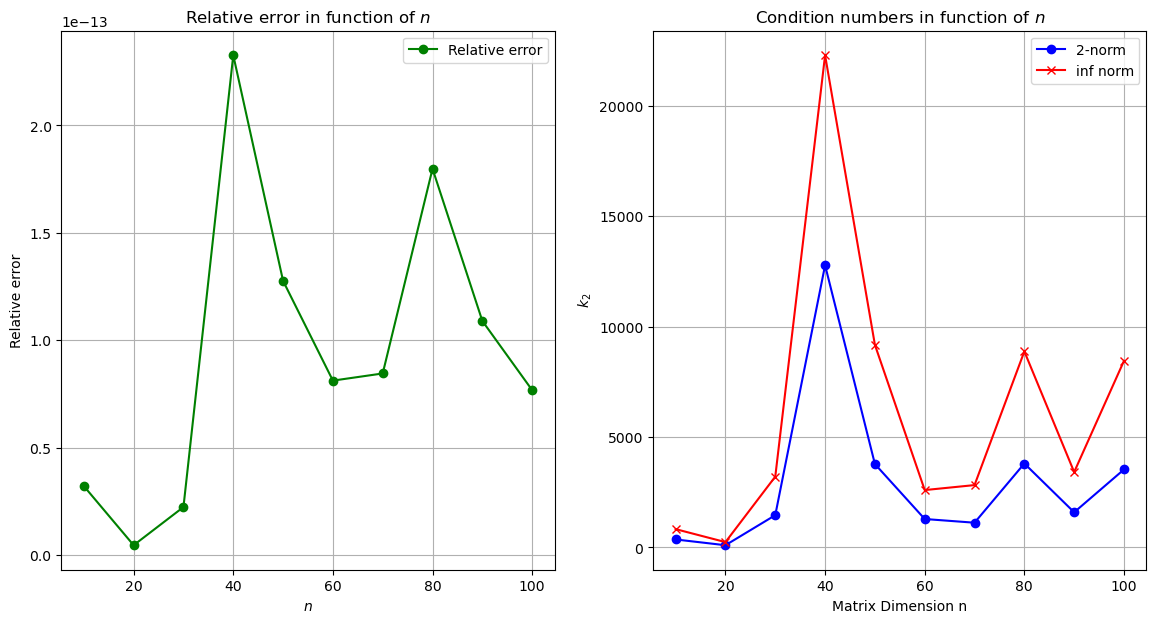

In [20]:
n_list = np.arange(10, 101, 10)
relative_errors = []
cond_2_s = []
cond_inf_s = []

for n in n_list :
    A = np.random.rand(n, n)
    cond_2, cond_inf, relative_error = direct_method_pipeline(A, n)
    cond_2_s.append(cond_2)
    cond_inf_s.append(cond_inf)
    relative_errors.append(relative_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(n_list, relative_errors, 'go-', label='Relative error')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Relative error')
ax1.set_title('Relative error in function of $n$')
ax1.legend()
ax1.grid(True)

ax2.plot(n_list, cond_2_s, 'bo-', label='2-norm')
ax2.plot(n_list, cond_inf_s, 'rx-', label='inf norm')
ax2.set_xlabel('Matrix Dimension n')
ax2.set_ylabel('$k_2$')
ax2.set_title('Condition numbers in function of $n$')
ax2.legend()
ax2.grid(True)

plt.show()

#### Vandermonde matrix

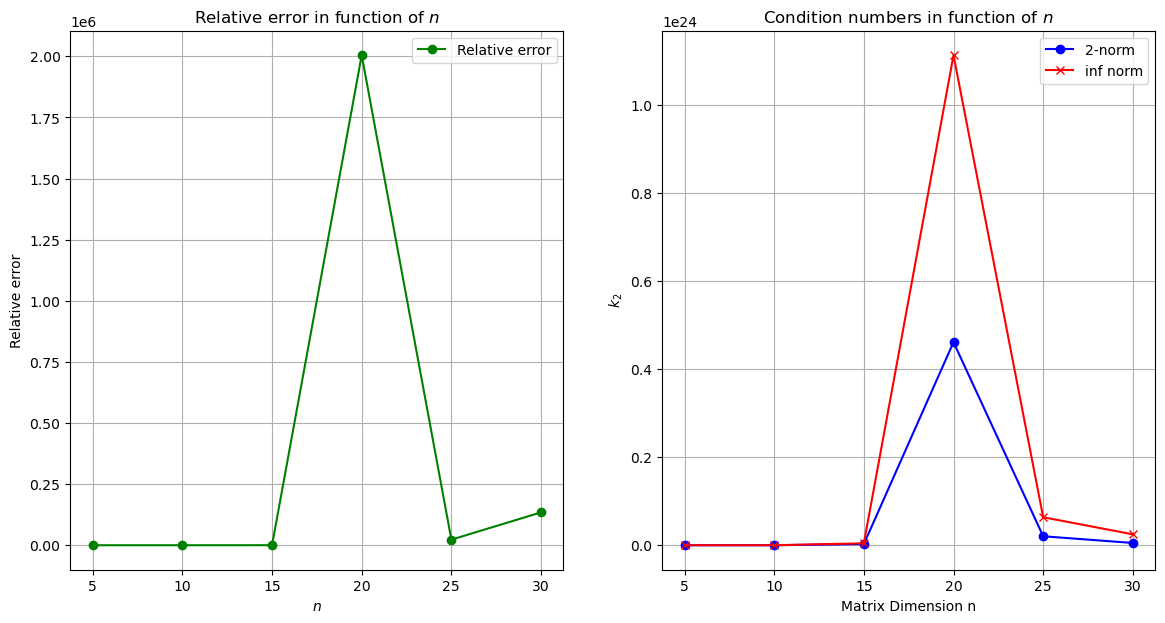

In [21]:
n_list = np.arange(5, 31, 5)
relative_errors = []
cond_2_s = []
cond_inf_s = []

for n in n_list :
    v = np.arange(1, n+1, 1)
    A = np.vander(v, n)
    cond_2, cond_inf, relative_error = direct_method_pipeline(A, n)
    cond_2_s.append(cond_2)
    cond_inf_s.append(cond_inf)
    relative_errors.append(relative_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(n_list, relative_errors, 'go-', label='Relative error')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Relative error')
ax1.set_title('Relative error in function of $n$')
ax1.legend()
ax1.grid(True)

ax2.plot(n_list, cond_2_s, 'bo-', label='2-norm')
ax2.plot(n_list, cond_inf_s, 'rx-', label='inf norm')
ax2.set_xlabel('Matrix Dimension n')
ax2.set_ylabel('$k_2$')
ax2.set_title('Condition numbers in function of $n$')
ax2.legend()
ax2.grid(True)

plt.show()

#### Hilbert matrix

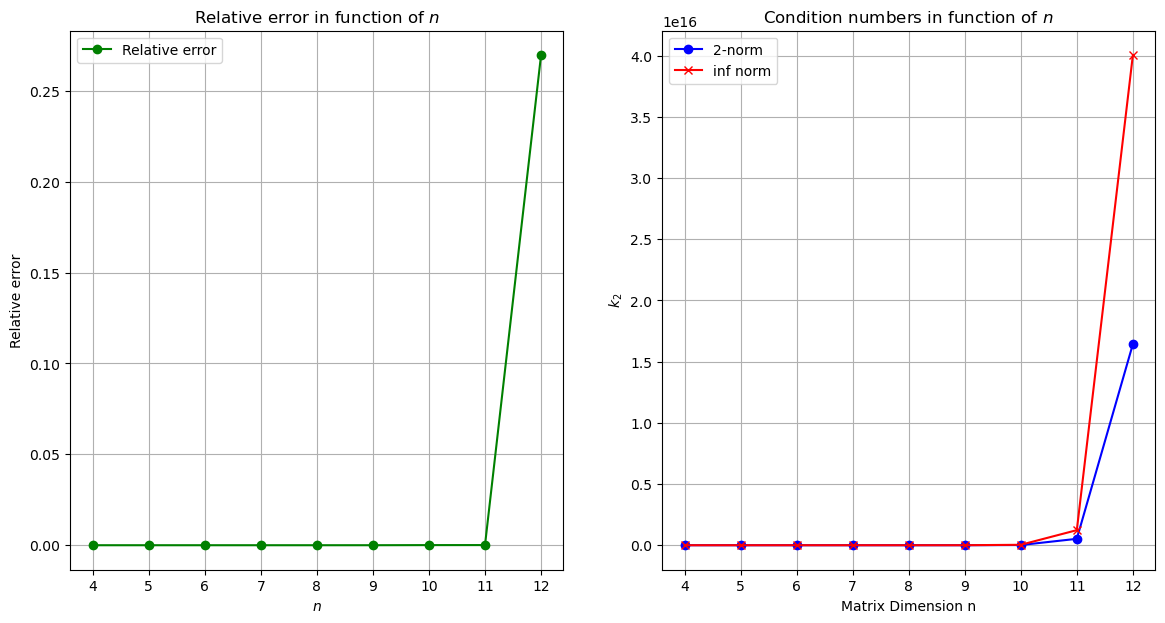

In [22]:
n_list = np.arange(4, 13, 1)
relative_errors = []
cond_2_s = []
cond_inf_s = []

for n in n_list :
    A = scipy.linalg.hilbert(n)
    cond_2, cond_inf, relative_error = direct_method_pipeline(A, n)
    cond_2_s.append(cond_2)
    cond_inf_s.append(cond_inf)
    relative_errors.append(relative_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.plot(n_list, relative_errors, 'go-', label='Relative error')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Relative error')
ax1.set_title('Relative error in function of $n$')
ax1.legend()
ax1.grid(True)

ax2.plot(n_list, cond_2_s, 'bo-', label='2-norm')
ax2.plot(n_list, cond_inf_s, 'rx-', label='inf norm')
ax2.set_xlabel('Matrix Dimension n')
ax2.set_ylabel('$k_2$')
ax2.set_title('Condition numbers in function of $n$')
ax2.legend()
ax2.grid(True)

plt.show()